# Expressed vs revealed preferences in Retro Funding 4

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## High level analysis of votes

In [36]:
def parse_payload(json_payload):
    ballot = json.loads(json_payload)
    allocations = {
        metric_id: weight
        for metric_dict in ballot['allocations']
        for metric_id, weight in metric_dict.items()
    }
    return {'allocations': allocations, 'os_multiplier': ballot['os_multiplier']}

votes = pd.read_csv('data/private/Voting data export final.csv')['Payload'].apply(parse_payload)

allocations = [v['allocations'] for v in votes]
df_votes = pd.DataFrame(allocations) / 100
metric_ids = df_votes.mean().sort_values(ascending=False).index

os_multiply = [v['os_multiplier'] for v in votes]
df_votes['os_multiplier'] = os_multiply

print("Total votes:", len(df_votes))

Total votes: 108


In [43]:
print("Number of votes by metric:")
df_votes[metric_ids].count()

Number of votes by metric:


gas_fees                         60
log_gas_fees                     52
trusted_users_onboarded          75
log_transaction_count            27
trusted_recurring_users          54
transaction_count                35
trusted_monthly_active_users     47
recurring_addresses              39
openrank_trusted_users_count     31
monthly_active_addresses         42
trusted_transaction_share        27
power_user_addresses             27
log_trusted_transaction_count    21
trusted_transaction_count        34
daily_active_addresses           21
trusted_daily_active_users       28
dtype: int64

In [44]:
print("Share of total weighting by metric:")
df_votes[metric_ids].fillna(0).mean() * 100

Share of total weighting by metric:


gas_fees                         19.191654
log_gas_fees                     12.257330
trusted_users_onboarded          12.492690
log_transaction_count             4.441688
trusted_recurring_users           8.666799
transaction_count                 5.067789
trusted_monthly_active_users      6.521383
recurring_addresses               5.163663
openrank_trusted_users_count      4.054655
monthly_active_addresses          5.108951
trusted_transaction_share         3.182680
power_user_addresses              2.996469
log_trusted_transaction_count     2.311246
trusted_transaction_count         3.740164
daily_active_addresses            2.058448
trusted_daily_active_users        2.744342
dtype: float64

<Axes: >

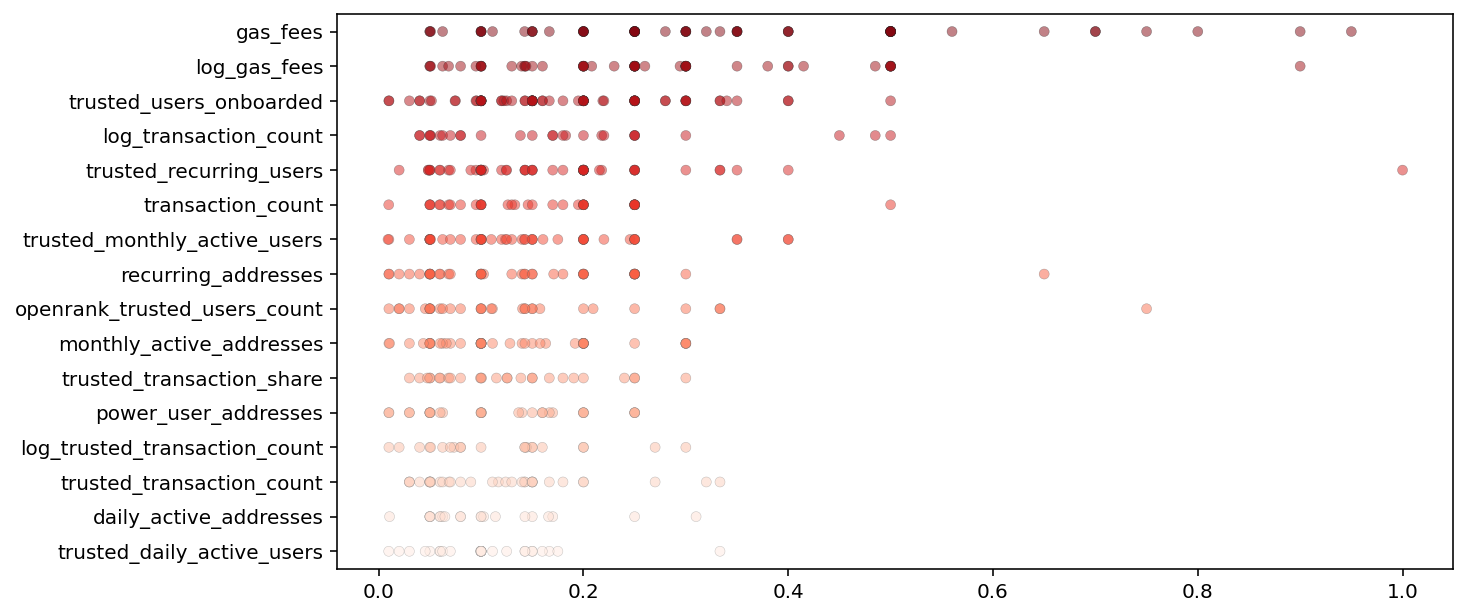

In [148]:
plt.figure(figsize=(10,5), dpi=144)
sns.stripplot(
    data=df_votes[metric_ids],
    orient='h',
    palette="Reds_r",
    alpha=.5,
    jitter=0,
    edgecolor='gray',
    linewidth=.25
)

5.0

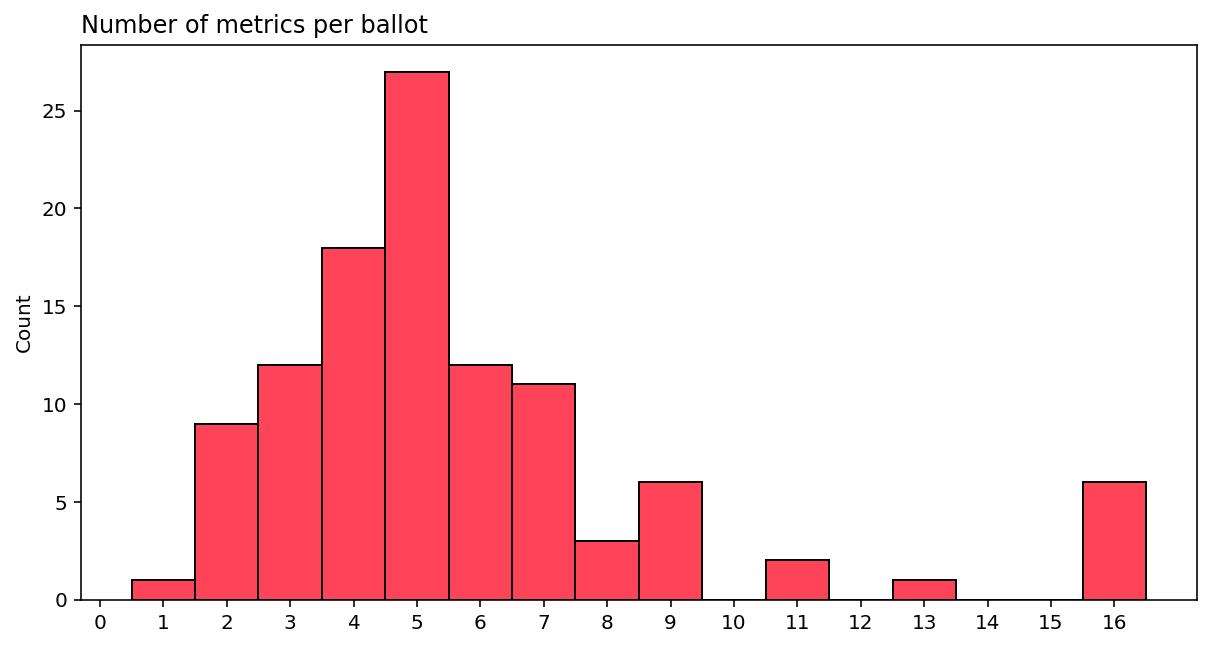

In [147]:
plt.figure(figsize=(10,5), dpi=144)
sns.histplot(df_votes[metric_ids].count(axis=1), bins=list(x+.5 for x in range(0,17)), color='#FF0420')
plt.xticks(list(range(0,17)))
plt.title("Number of metrics per ballot", loc='left')
df_votes[metric_ids].count(axis=1).median()

## Analysis by metric category

In [37]:
metric_groups = {
    'gas_fees': [
        'log_gas_fees',
        'gas_fees'
    ],
    'txn_counts': [
        'log_transaction_count',
        'transaction_count'
    ],
    'trusted_txn_counts': [
        'log_trusted_transaction_count', 
        'trusted_transaction_count'
    ],
    'trusted_users': [
        'trusted_daily_active_users',
        'trusted_monthly_active_users',
        'trusted_transaction_count',
        'log_trusted_transaction_count',
        'trusted_transaction_share',
        'trusted_users_onboarded',
        'openrank_trusted_users_count',
        'trusted_recurring_users'
    ],
    'logs': [
        'log_gas_fees',
        'log_transaction_count',
        'log_trusted_transaction_count'
    ],
    'network_growth': [
        'gas_fees',
        'log_gas_fees',
        'transaction_count',
        'log_transaction_count'
    ],
    'network_quality': [
        'trusted_transaction_count',
        'log_trusted_transaction_count',
        'trusted_transaction_share'
    ],
    'user_growth': [
        'daily_active_addresses',
        'monthly_active_addresses',
        'power_user_addresses',
        'recurring_addresses'
    ],
    'user_quality': [
        'trusted_daily_active_users',
        'trusted_monthly_active_users',
        'trusted_recurring_users',
        'trusted_users_onboarded',
        'openrank_trusted_users_count'
    ]
}

In [61]:
for grouping, metric_list in metric_groups.items():
    filt = df_votes[metric_list].sum(axis=1)
    num_metrics = len(metric_list)
    n = len(filt[filt>0])
    m = filt.mean() * 100
    print(f"{grouping} ({num_metrics} metrics): n={n} ballots, wt={m:.1f}%")

gas_fees (2 metrics): n=94 ballots, wt=31.4%
txn_counts (2 metrics): n=51 ballots, wt=9.5%
trusted_txn_counts (2 metrics): n=42 ballots, wt=6.1%
trusted_users (8 metrics): n=92 ballots, wt=43.7%
logs (3 metrics): n=60 ballots, wt=19.0%
network_growth (4 metrics): n=98 ballots, wt=41.0%
network_quality (3 metrics): n=47 ballots, wt=9.2%
user_growth (4 metrics): n=69 ballots, wt=15.3%
user_quality (5 metrics): n=89 ballots, wt=34.5%


## Compare votes with survey results

In [132]:
cols_to_keep = [2,3,4,5,6,7,10,11,12]
df_survey = pd.read_csv('data/private/Impact_Metric_Survey.csv', usecols=cols_to_keep)
df_survey.columns = [
    'user_growth_or_user_quality',
    'onboarding_new_users',
    'retaining_users',
    'engaging_trusted_users',
    'maintaining_high_levels_of_daily_activity',
    'attracting_loyal_power_users', 
    'network_activity_growth_or_quality',
    'generating_blockspace_demand',
    'using_open_source_and_permissive_licenses'
]
general_prefs = ['user_growth_or_user_quality', 'network_activity_growth_or_quality']
specific_prefs = [c for c in df_survey.columns if c not in general_prefs]
df_survey = df_survey[general_prefs+specific_prefs]
df_survey.dropna(inplace=True)

for pref in general_prefs:
    df_survey[pref] = df_survey[pref].apply(lambda x: x.split(' ')[0])

print("Num surveys:",len(df_survey))

Num surveys: 38


In [133]:
for pref in general_prefs:
    print(pref)
    print((df_survey[pref].value_counts()/38).to_dict())
    print()

user_growth_or_user_quality
{'Quality': 0.47368421052631576, 'Both': 0.2894736842105263, 'Growth': 0.23684210526315788}

network_activity_growth_or_quality
{'Both': 0.4473684210526316, 'Quality': 0.39473684210526316, 'Growth': 0.15789473684210525}



In [134]:
df_survey[specific_prefs].mean()

onboarding_new_users                         7.184211
retaining_users                              7.736842
engaging_trusted_users                       6.684211
maintaining_high_levels_of_daily_activity    5.605263
attracting_loyal_power_users                 7.078947
generating_blockspace_demand                 6.947368
using_open_source_and_permissive_licenses    8.157895
dtype: float64

In [135]:
df_votes.mean(axis=0).sort_values(ascending=False)

os_multiplier                    2.109259
gas_fees                         0.345450
log_gas_fees                     0.254575
trusted_users_onboarded          0.179895
log_transaction_count            0.177668
trusted_recurring_users          0.173336
transaction_count                0.156377
trusted_monthly_active_users     0.149853
recurring_addresses              0.142994
openrank_trusted_users_count     0.141259
monthly_active_addresses         0.131373
trusted_transaction_share        0.127307
power_user_addresses             0.119859
log_trusted_transaction_count    0.118864
trusted_transaction_count        0.118805
daily_active_addresses           0.105863
trusted_daily_active_users       0.105853
dtype: float64

In [136]:
len(df_survey[df_survey['using_open_source_and_permissive_licenses'] >= 7]) / 38

0.868421052631579

In [137]:
len([x for x in os_multiply if x>1]) / 108

0.7962962962962963

<Axes: >

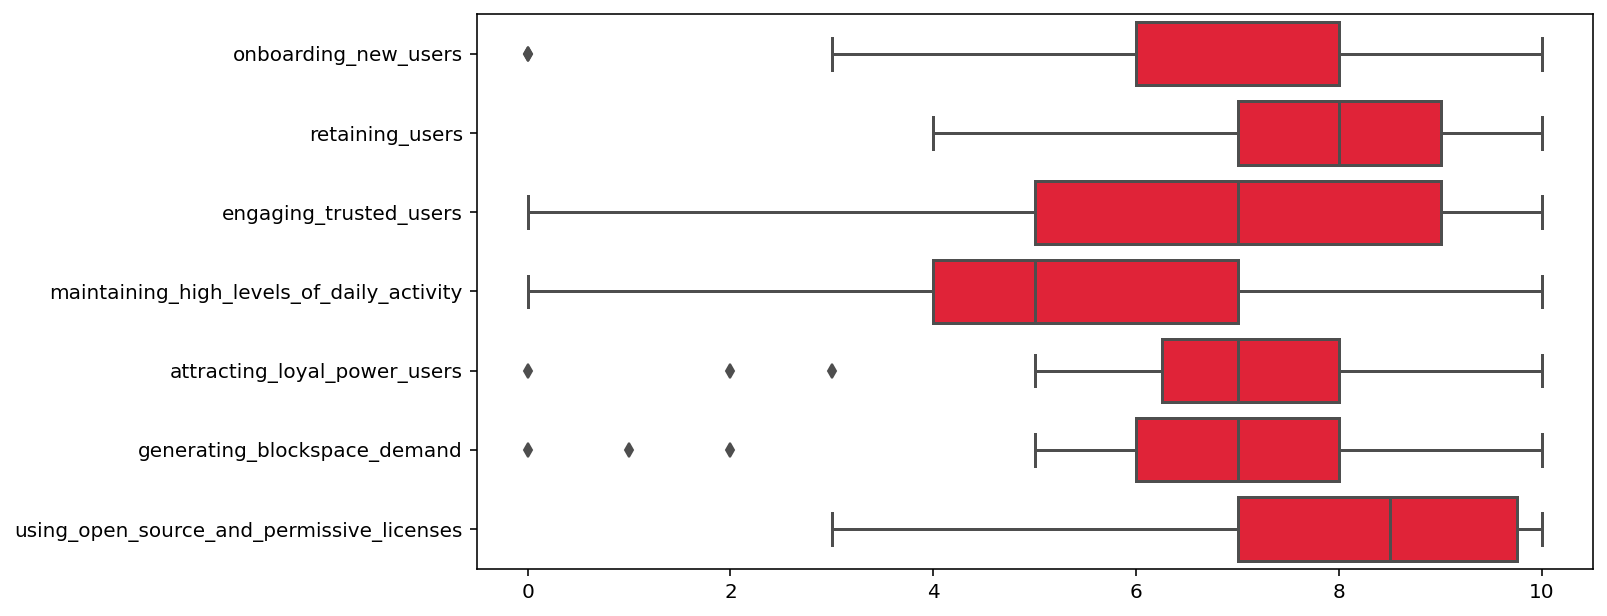

In [146]:
plt.figure(figsize=(10,5), dpi=144)
sns.boxplot(
    data=df_survey[specific_prefs],
    orient='h',
    color='#FF0420'
)

## Voting blocs

<Axes: >

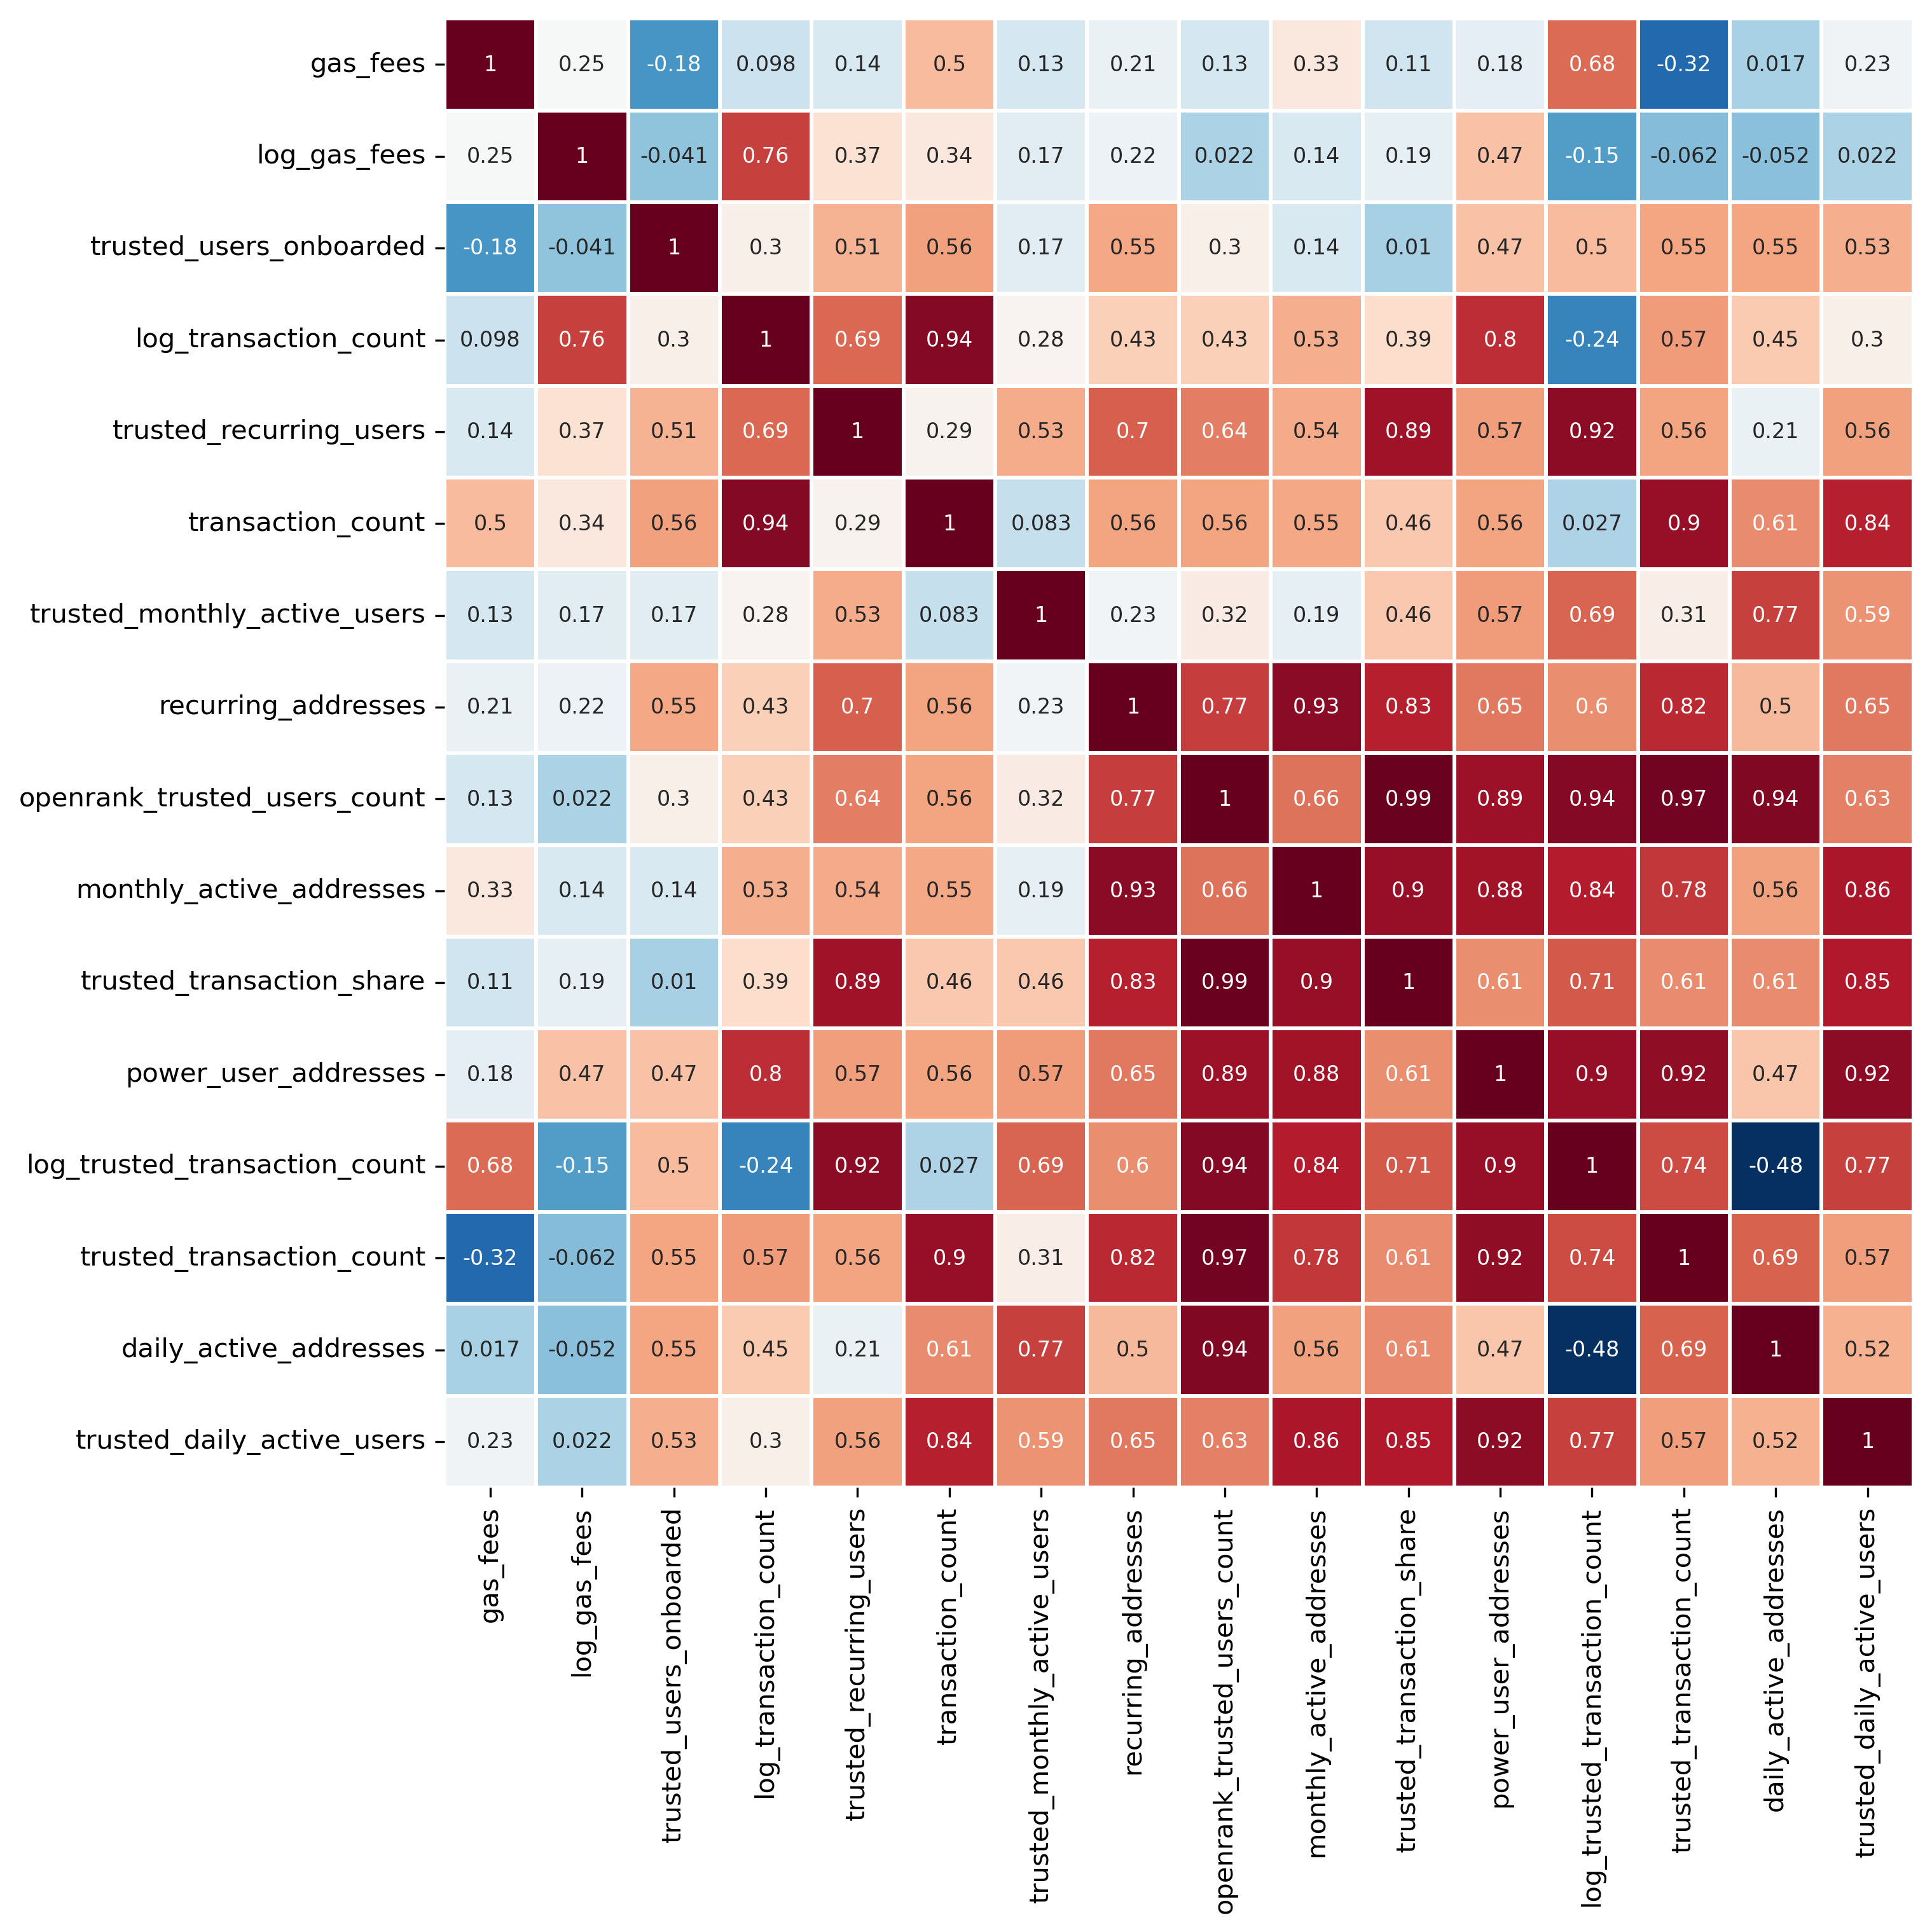

In [144]:
plt.figure(dpi=300, figsize=(10,10))
sns.heatmap(
    df_votes[metric_ids].corr(),
    cmap='RdBu_r',
    annot=True,
    annot_kws={'size': 8},
    edgecolor='white',
    linewidth=1,
    square=True,
    cbar=False
)

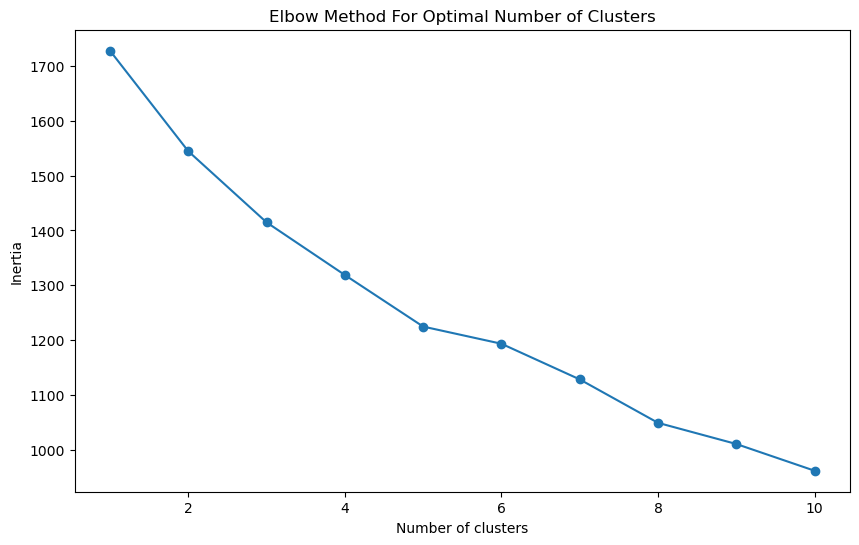

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

votes_df = df_votes[metric_ids].copy().fillna(0)
scaler = StandardScaler()
scaled_votes = scaler.fit_transform(votes_df)

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=3)
    kmeans.fit(scaled_votes)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=3, random_state=42)
votes_df['Cluster'] = kmeans.fit_predict(scaled_votes)
votes_df['Cluster'].value_counts()

Cluster
0    57
2    28
1    23
Name: count, dtype: int64

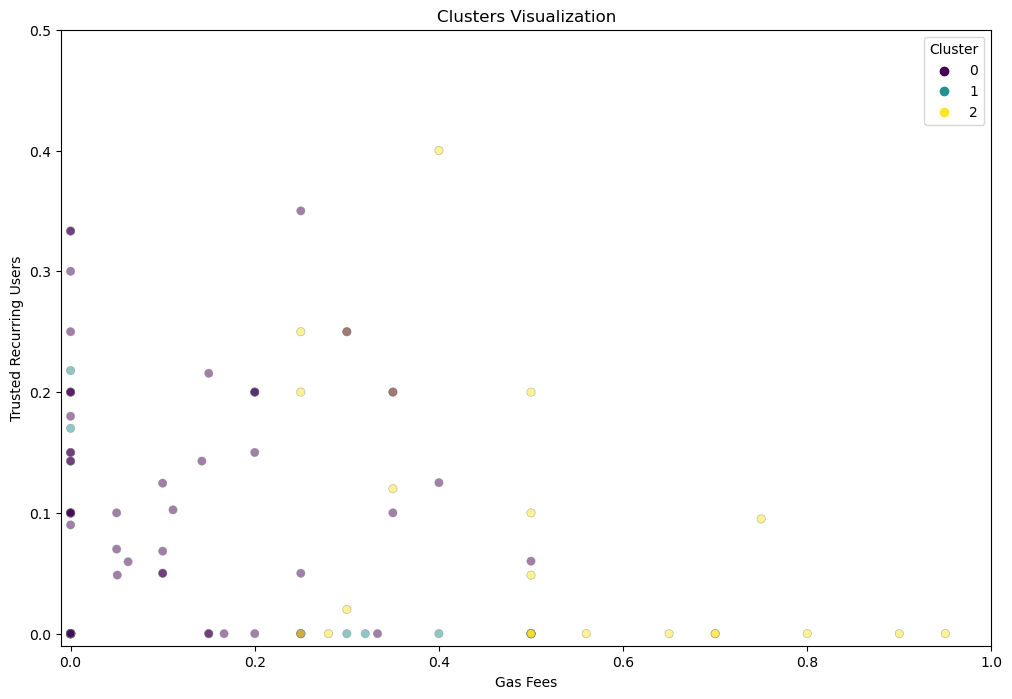

,0,1,2
gas_fees,0.101174,0.074783,0.472859
log_gas_fees,0.094380,0.255576,0.070715
trusted_users_onboarded,0.156500,0.065435,0.109521
log_transaction_count,0.018273,0.143718,0.016070
trusted_recurring_users,0.119103,0.029906,0.067265
transaction_count,0.022826,0.021560,0.131296
trusted_monthly_active_users,0.112971,0.010870,0.012634
recurring_addresses,0.016728,0.137969,0.051784
openrank_trusted_users_count,0.066878,0.016824,0.006429
monthly_active_addresses,0.027664,0.136123,0.028929


In [143]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=votes_df,
    x='gas_fees',
    y='trusted_recurring_users',
    hue='Cluster',
    palette='viridis',
    alpha=.5,
    edgecolor='gray',
    linewidth=.5
)
plt.title('Clusters Visualization')
plt.xlabel('Gas Fees')
plt.ylabel('Trusted Recurring Users')
plt.xlim(-.01,1)
plt.ylim(-.01,.5)
plt.show()

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=votes_df.columns[:-1])
centroids['Cluster'] = centroids.index
centroids.T